## Using Machine Learning Real-Time Surgical Solutions 

By Blake Cunningham

As the years go on, technology always continues to advance to new heights. In our day, we live in a world where Collaboration has reached a new height. In hospitals technology assists doctors in a litany of ways, and with this increase comes better care and better medical solutions. Since the release of the Microsoft Hololens, AR technology that takes on a feeling of holograms in the real world, there has been various test runs that it has had in the medical field. Today, it and technology like it are being used for more advanced teaching as well as enhanced collaboration between doctors and surgeons. To read about this unbelievable advancement in technology check out "Collaboration and Preparation" by Crag Guillot [2]. 

This advancement also opens up new possibilities that could have real life saving results. The amount of paperwork, testing, recording, and details that are involved throughout the medical field provide a unique oppurtunity. Machine Learning provides a way to take all of this data that is taken on a day to day basis and put it to good use. Imagine in the operating room a program watching the patients vitals and being fed information by the doctors. A program whose purpose is not to prevent doctors from making decisions, but rather provide them with real time calculations and suggestions based on the data taken by their own colleagues. Now how to do this? A group, MOVER, collected all of the data relevant to surgical procedures at one hospital from 2017 to 2022 [1]. Using this data some models were created to prove the efficacy of machine learning in this kind of application as well as to illustrate its possible benefits. With the advancements in AR technology and combining Machine Learning programs trained off data like this, the possibilities are endless.

## Loading the Data

The dataset being used for this project [2] its quite thorough and the average computer cannot handle the load of it. This is because this dataset covers all surgically related information over the course of 6 years. No matter how good a doctor or surgeon is that much information is just too much. Having a program that could take in all the possibilities and provide suggestions, percentages, possible treatment, better estimation of recovery times, and so much more. For the purposes of this project we will be focusing more on its passive abilities and then analyzing how these abilities can be utilized. To be specific this project will analyze portions of 9 datasets that carry a variety of patient information, relating to pre-op, post-op, complication during and after surgery, as well as a few other factors.

In [2]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

fp = "patient_coding.csv"
fp1 = "patient_history.csv"
fp2 = "patient_information.csv"
fp3 = "patient_labs.csv"
fp4 = "patient_lda.csv"
fp5 = "patient_medications.csv"
fp6 = "patient_post_op_complications.csv"
fp7 = "patient_procedure_events.csv"
fp8 = "patient_visit.csv"

# Read the CSV file
df = pd.read_csv(fp)
df1 = pd.read_csv(fp1)
df2 = pd.read_csv(fp2)
df3 = pd.read_csv(fp3)
df4 = pd.read_csv(fp4)
df5 = pd.read_csv(fp5)
df6 = pd.read_csv(fp6)
df7 = pd.read_csv(fp7)
df8 = pd.read_csv(fp8)

Loading CSV Data:
                MRN  SOURCE_KEY                       SOURCE_NAME  \
0  798a98e2a1bcbac7           3  Final Diagnosis Primary Code Set   
1  798a98e2a1bcbac7           3  Final Diagnosis Primary Code Set   
2  798a98e2a1bcbac7           3  Final Diagnosis Primary Code Set   
3  798a98e2a1bcbac7           3  Final Diagnosis Primary Code Set   
4  798a98e2a1bcbac7          11    ICD Procedure Primary Code Set   

                                                NAME REF_BILL_CODE_SET_NAME  \
0  Infection and inflammatory reaction due to int...              ICD-10-CM   
1  Postprocedural septic shock, initial encounter...              ICD-10-CM   
2                   Hypo-osmolality and hyponatremia              ICD-10-CM   
3     Nicotine dependence, cigarettes, uncomplicated              ICD-10-CM   
4        Excision of Left Upper Femur, Open Approach             ICD-10-PCS   

  REF_BILL_CODE  
0      T84.621A  
1      T81.12XA  
2         E87.1  
3       F17.210  
4 

# Predictive Modeling

Predictive modeling can be a very useful tool. Predictive modeling is all about fine tuning. If given enough data one should be able to draw conclusions based on similarities in the data. This code snippet shows a section of code that takes all of the numerical data and inputs it into a RandomForestClassifier, which randomly builds information in a hierarchal structure. As the information builds upon itself the model, hypothetically, becomes more and more accurate, thus if given enough data, it will provide a valid solution. As can be seen in the below code snippet when modeling this information, the model was able to determine accurate predictions for patient information based on the general information of a patient. The model predicts in a 97 percentile and can make a prediction in a tenth of a second. 

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming 'target_column' is the column you want to predict
target_column = 'DISCH_DISP_C'

# Combine dataframes if needed
combined_df = pd.concat([df, df1, df2, df3], axis=0, sort=False)

# Drop non-numeric columns and columns with incompatible data
exclude_columns = ['non_numeric_column1', 'non_numeric_column2', 'date_time_column']
combined_df = combined_df.select_dtypes(include=['number']).drop(columns=exclude_columns, errors='ignore')

# Fill missing values if needed
combined_df.fillna(0, inplace=True)  # Replace NaN values with 0 (modify as needed)

# Feature selection
features = combined_df.drop(columns=[target_column])

# Target variable
target = combined_df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a RandomForestClassifier model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 0.97


# Risk Classifiction and Enhanced Diagnosis

Risk Classification and Enhanced Diagnosis focuses on identifying problems and mapping percentages of possible reasons for these problems. This application can be seen in the form of WebMD where you type in your symptoms and then are terrified when WebMD innacurately says you have cancer. Unlike WebMD this model is able to match Risks for certent procedures, based on informtaion and provide accurate diagnosis based on the patients information and chart. This kind of prediction is a bit more complex but still, the program is able to predict in the 89 percentile. Now taking the thought behind this code and enhancing it, we use it as a real time analysis tool for doctors to use to be told possible diagnosis, and percentage of diagnosis based on patient symptoms. Although doctors are able to do that on their own, in situations where diagnosis is much more complex this tool would be able to save doctors immeasuarable amount of valuable time, since the program would help them get in the right ballpark of what the diagnosis should be.

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'diagnosis_code' is the target column for classification
target_column = 'diagnosis_code'

# Combine dataframes if needed
combined_df = pd.concat([df, df1, df2, df3], axis=0).reset_index(drop=True)  # Reset index to make it unique

# Feature selection
numerical_features = ['LOG_ID', 'MRN', 'HOSP_ADMSN_TIME']
categorical_features = ['SEX', 'SOURCE_NAME', 'DISCH_DISP', 'ENC_TYPE_NM',
                         'PRIMARY_ANES_TYPE_NM', 'ASA_RATING', 'PATIENT_CLASS_GROUP']

# Check if 'ABNORMAL_FLAG' is in the dataframe
if 'ABNORMAL_FLAG' in combined_df.columns:
    categorical_features.append('ABNORMAL_FLAG')

# Identify target variable
target = combined_df[target_column]

# Label encode the target variable
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# One-hot encode categorical features
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
# Check if categorical features exist in the dataframe before encoding
if set(categorical_features).issubset(combined_df.columns):
    encoded_categorical_features = onehot_encoder.fit_transform(combined_df[categorical_features])
    # Combine numerical and encoded categorical features
    features = pd.concat([combined_df[numerical_features], pd.DataFrame(encoded_categorical_features)], axis=1)
    
    # Convert non-numeric values to numeric using label encoding
    features = features.apply(pd.to_numeric, errors='coerce').fillna(0)  

    # Standardize the features
    scaler = StandardScaler()
    features_standardized = scaler.fit_transform(features)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features_standardized, target_encoded, test_size=0.2, random_state=42)

    # Create a Support Vector Machine (SVM) classifier
    classifier = SVC()

    # Train the classifier
    classifier.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = classifier.predict(X_test)

    # Decode the predictions back to original labels
    decoded_predictions = label_encoder.inverse_transform(predictions)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy: {accuracy}")

else:
    print("Categorical features not found in the dataframe.")


Accuracy: 0.89


# Clustering Patients Medical Similarities

Clustering is taking certain information and then using it to cluster the other pieces of data around it. This could have a variety of uses. Below shows a code snipped with the simple goal of searching through all the information provided and clustering all of one patients information together. Since the amount of data collected in a hospital is vast it is hard to collect this data and keep all patient information together at all times. This code looks for a patients identification and then groups all of their information into a cluster. The next step forward would be to take all of the clusters formed by a particular patients information and then do a second round of clusters based on similarities. This kind of program would allow doctors to reference past patients with similar conditions at ease without the headache of all the research.

In [17]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Combine dataframes if needed
combined_df = pd.concat([df, df1, df2, df3], axis=0)

# Preprocess 'HEIGHT' column to extract numerical values
combined_df['HEIGHT'] = combined_df['HEIGHT'].str.extract('(\d+)').astype(float)

# Select relevant features for clustering
numerical_features = ['HEIGHT', 'LOS', 'WEIGHT']  # Add numerical columns as needed
categorical_features = ['ASA_RATING_C', 'DISCH_DISP_C', 'ENC_TYPE_NM', 'ICU_ADMIN_FLAG', 'SEX']  # Add categorical columns as needed

# Create a ColumnTransformer to apply transformations separately to numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Create a pipeline with preprocessing and clustering
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('imputer', SimpleImputer(strategy='mean', missing_values=float('nan'), fill_value=None)),  # Impute missing values for numerical features only
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])

# Fit the pipeline
pipeline.fit(combined_df[numerical_features + categorical_features])

# Add the cluster information to the dataframe
combined_df['Cluster'] = pipeline.predict(combined_df[numerical_features + categorical_features])


# Statistical Analysis

Detailed statistical analysis is vital. Understanding that the smallest thing can have the biggest impact is something that is easily forgotten. With the use of machine learning statistical anyalsis doctors could anylyze actively changing data to provide accurate feedback for diagnosis, change in medication, and teaching oppurtunities. Below is a comprehensive statistical analysis of how the different factors of a patients information relate to each other, This analysis can be used in teaching the less knowledgable about the cause and effect of certain conditions or to help a seasoned doctor prevent wasting time comparing different procedures data themselves.

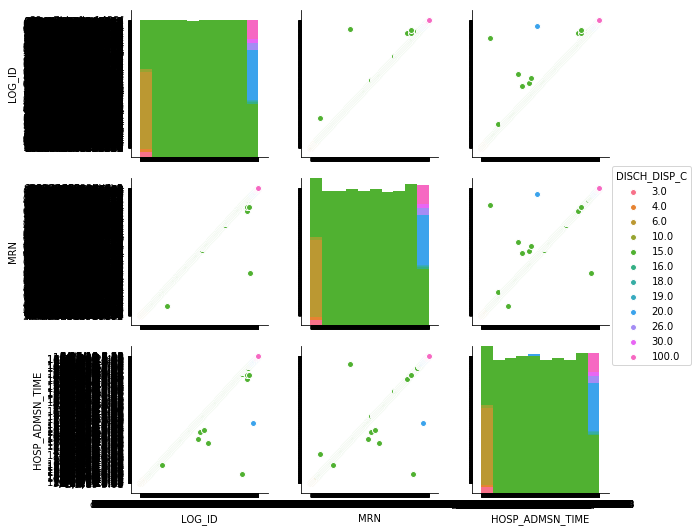

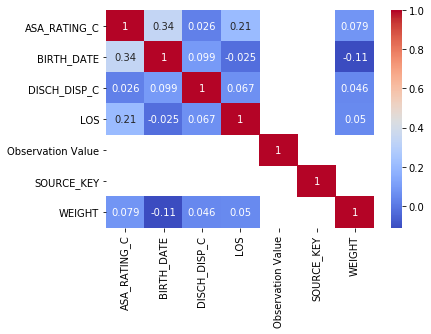

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'target_variable' is the variable you want to analyze relationships with
target_variable = 'DISCH_DISP_C'

# Combine dataframes if needed
combined_df = pd.concat([df, df1, df2, df3], axis=0)

# Example: Pairplot for visualization
sns.pairplot(combined_df, vars=['LOG_ID', 'MRN', 'HOSP_ADMSN_TIME'], hue=target_variable)
plt.show()

# Example: Correlation heatmap
correlation_matrix = combined_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


# Understanding Application

Each of the code segments above have their own use but the real beauty would be in combining all of them. A program trained on data related to a particular procedure that is running live and taking in data in the operating room itself. Before the procedure starts the program will make sure to load and have all relevant information for possible complications as well as pre-op predictions ready. Using clustering and predictive modeling the program will provide doctors with what should be reminders of the odds and possibilities that can come from thh procedure being performed. Statistical analysis can then compare the patients vitals and general condition to their baseline information as well as information from the procedure events data it was trained on to provide analysis of when issues are rising with the patient, and what to watch for based on the changing environmental variables. If an issue occurs using all 4 of the methods the program can then provide predictions, odds, and strategies for best steps based on in the moment issues.

With the rise in AR all of this can be taken to the next level as well. Models, interactive graphics associated with those prodects, have been created for training as well as collaboration amongst doctors. Now using the tools from machine learning as well as the new and improving tech we could have an AI using the machine learning to make predictions and suggestions, while taking in data itself, and then not only propose these suggestions but provide 3D graphics walking through the steps and visualizing the problem. While doctors and surgeons are very well trained every second counts in these kinds of circumstances. Having a machine fascilitating keeping the operating room as efficient as possible could really save a lot of lives not to mention revolutionize teaching in this field.

In conclusion the possibilities for machine learning in the medical world is endless, but the time that it can save not only will make doctors lives easier, but could save a lot of lives.

# Works Cited:

1. Samad M, Angel M, Rinehart J, Kanomata Y, Baldi P, Cannesson M. Medical Informatics Operating Room Vitals and Events Repository (MOVER): a public-access operating room database. JAMIA Open. 2023 Oct 17;6(4):ooad084. doi: 10.1093/jamiaopen/ooad084. PMID: 37860605; PMCID: PMC10582520.

2. Craig Guillot&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Craig Guillot is a business writer based in New Orleans. He specializes in technology and writes about IoT,  cybersecurity and S. for trade publications and tech companies. (2023, May 22). Collaboration and preparation: What mixed reality surgery affords the operating room. Technology Solutions That Drive Healthcare. https://healthtechmagazine.net/article/2021/03/collaboration-and-preparation-what-mixed-reality-surgery-affords-operating-room 
